# Statistics Meets Logistics
--- 

## Description
This notebook holds the DataFrames and analysis for the project. Requirements for the project environment can be found in https://github.com/luiul/statistics-meets-logistics/blob/main/requirements.txt. **Disclaimer**: the project has not been tested in other environments. 

## Goal 
The goal of this project is to perform a regression analysis given raw download and upload data to estimate the throughput of the system, i.e. the label we're trying to predict. 

## Overview
We were given raw download and upload data collected from ...

## In General
In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome variable') and one or more independent variables (often called 'predictors', 'covariates', or 'features').

## Question
What is the predicted throughput?

# Import Libraries and Set Options
---

## Import Libraries

In [1]:
# Vector (Series) & Matrix (DateFrame) manipulation 
import numpy as np
import pandas as pd

In [2]:
# Data Visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# If JaveScript is configured and enabled: 
# static images: 
# %matplotlib inline

# interactive images: 
# %matplotlib notebook

In [3]:
# Python Utilities
# Generate datetime objects from raw timestamps and vice versa
from datetime import datetime

# OS Interface
# import os

# Regex search patterns 
# import re

## Check Prerequisites

In [4]:
# calling np.version.version should return 1.18.1
# np.version.version

# calling pd.__version__ should return 1.1.2
# pd.__version__

## Set Options

In [5]:
pd.set_option('display.max_columns',None)
# avoid truncate view of DataFrame (scroll to view all columns); set to 0 for pandas to auto-detect the with of the terminal and print truncated object that fits the screen width

# pd.set_option('float_format', '{:.2f}'.format)
# prints floats with two decimal points; do not comment out in this project since the features lat and lon have sigficant figures after two decimal points

In [6]:
# Display all outsputs if the cell has multiple commands as its input

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

## Scikit-learn Libraries

### Train | Test Split & Pre-Processing

In [7]:
# Split Function (see Signature for correct tuple unpacking)
# from sklearn.model_selection import train_test_split

# Default split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
# When perfroming a classic Train | Test Spit fit ONLY to X_train to avoid data leakage! (Follow Procedure described in documentation under Cross Validation and Linear Regression Project)

# Data Scaling (iff values are in different order of magnitude)
# from sklearn.preprocessing import StandardScaler

In [9]:
# k-fold cross validation scores; estimator = ML model, cv = fold value, scoring = error metric (use the ones provided by sklearn!)

# from sklearn.model_selection import cross_val_score

In [10]:
# Polynomial Regression ( poly_trafo: X->X*...*X )
# from sklearn.preprocessing import PolynomialFeatures

In [11]:
# Grid search with cross vadlidation
# from sklearn.model_selection import GridSearchCV

### Linear Models

In [12]:
# Linear Regression Model
# from sklearn.linear_model import LinearRegression

In [13]:
# Elastic Net Regularization: start here for regularization in Linear Regression. Make sure to keep an l1_ratio that allows us to go fully to Lasso or fully to Ridge. See Lasso and Ridge explanations below. 
# from sklearn.linear_model import ElasticNetCV

# Use from sklearn.linear_model import ElasticNet in case CV done manually / grid search

# Standard procedure with no grid search: create X and y, split data, scale data (stadardize)
# Standard procedure with grid search: create X and y, split data, scale data (stadardize), instantiate base model, 

In [14]:
# L2: Ridge Regularization: adds beta squared shrinkage penalty. Hyper-parameter alpha: alpha=0 -> RSS minimization. L2 CV takes an alpha tuple and computes the hyper-parameter that delivers the best performance (either based on default scorer or one from the SCORES dictionary)
# from sklearn.linear_model import RidgeCV

# Use from sklearn.linear_model import Ridge in case CV done manually

In [15]:
# L1: Lasso Regularization: adds absolute beta value shrinkage penalty. Hyper-parameter alpha: alpha=0 -> RSS minimization. There are two ways to determine the alpha hyper-parameter: (a) provide list of alphas as an array (b) alpha can be set automatically by the class based off epsilon and n_alphas (we use the default values)
# from sklearn.linear_model import LassoCV

# Use from sklearn.linear_model import Lasso in case no CV done manually

### Support Vector Machines

In [16]:
# from sklearn.svm import SVR

# from sklearn.svm import LinearSVC
# faster than the generic version with the caveat that it only has a linear kernel

### Performance Metrics

In [17]:
# Performance Evaluation: common evaluation metrics; they can also be found in the SCORES dictionary (although transformed s.t. the higher the score the better, the model performance)
# from sklearn.metrics import mean_absolute_error, mean_squared_error

In [18]:
# Dictionary with different scorer objects; higher return values are better than lower return values by convention, e.g. negative error maximization -> the higher the score, the better the model performance
# from sklearn.metrics import SCORERS

In [19]:
# Normal Probability Plot
# import scipy as sp

### Model Deployment

In [20]:
# ML Model Deployment 
# from joblib import dump, load

# Feature Engineering and Data Preparation
---

## Read in Data and Instantiate DataFrame 
We read in the feature description and the raw download data. The DataFrame 'df' will be transformed in this Section. The DataFrame 'df_raw' will remained unchanged and serve as a reference throughout the project. 

In [21]:
# Read in the feature description 

# with open('./data/feature-des.txt',mode='r') as f:
#     print(f.read())  

In [22]:
df = pd.read_csv('./data/dl-raw.csv', delim_whitespace=True)

In [23]:
df_raw = pd.read_csv('./data/dl-raw.csv', delim_whitespace=True)

In [24]:
df.head()

,timestamp,rawTimesamp,distance,lat,lon,alt,speed,acc,dir,connected,rsrp,rsrq,sinr,cqi,ss,ta,ci,pci,id,payload,throughput,rtt,measurement,location
0,10.33,1544432937,99.42,51.490553,7.413966,157.63,11.83,0.00,79.35,1,-85,-5,22,10,50,7,26385408,95,0,0.1,6.83763,41,1544432927,campus
1,21.87,1544432949,237.43,51.490715,7.416002,152.41,10.76,-0.52,89.45,1,-84,-6,11,13,52,4,29391105,167,1,2.0,9.71463,58,1544432927,campus
2,32.46,1544432959,325.26,51.490668,7.417176,154.64,6.19,-0.62,27.05,1,-82,-6,21,15,54,4,29391105,167,2,2.0,7.30594,57,1544432927,campus
3,46.40,1544432973,448.27,51.491839,7.416804,155.87,9.77,-0.98,342.45,1,-94,-9,9,9,45,4,29391105,167,3,3.0,3.94997,163,1544432927,campus
4,54.95,1544432982,540.48,51.492531,7.416222,154.41,12.33,0.01,336.68,1,-90,-6,16,9,45,4,29391105,167,4,5.0,8.54884,59,1544432927,campus


In [25]:
df.columns

Index(['timestamp', 'rawTimesamp', 'distance', 'lat', 'lon', 'alt', 'speed',
       'acc', 'dir', 'connected', 'rsrp', 'rsrq', 'sinr', 'cqi', 'ss', 'ta',
       'ci', 'pci', 'id', 'payload', 'throughput', 'rtt', 'measurement',
       'location'],
      dtype='object')

In [26]:
len(df)

2141

## Drop Features With No Information 

Drop features with no information (connected). 

In [27]:
for column in df: 
    if len(df[column].unique()) < 2:
        print(f"Feature '{column}' contains no information!")
        df = df.drop(column,axis=1)
        print("-> Feature was dropped from the DataFrame")

Feature 'connected' contains no information!
-> Feature was dropped from the DataFrame


In [28]:
df.head()

,timestamp,rawTimesamp,distance,lat,lon,alt,speed,acc,dir,rsrp,rsrq,sinr,cqi,ss,ta,ci,pci,id,payload,throughput,rtt,measurement,location
0,10.33,1544432937,99.42,51.490553,7.413966,157.63,11.83,0.00,79.35,-85,-5,22,10,50,7,26385408,95,0,0.1,6.83763,41,1544432927,campus
1,21.87,1544432949,237.43,51.490715,7.416002,152.41,10.76,-0.52,89.45,-84,-6,11,13,52,4,29391105,167,1,2.0,9.71463,58,1544432927,campus
2,32.46,1544432959,325.26,51.490668,7.417176,154.64,6.19,-0.62,27.05,-82,-6,21,15,54,4,29391105,167,2,2.0,7.30594,57,1544432927,campus
3,46.40,1544432973,448.27,51.491839,7.416804,155.87,9.77,-0.98,342.45,-94,-9,9,9,45,4,29391105,167,3,3.0,3.94997,163,1544432927,campus
4,54.95,1544432982,540.48,51.492531,7.416222,154.41,12.33,0.01,336.68,-90,-6,16,9,45,4,29391105,167,4,5.0,8.54884,59,1544432927,campus


## Intial Exploration

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2141 entries, 0 to 2140
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    2141 non-null   float64
 1   rawTimesamp  2141 non-null   int64  
 2   distance     2141 non-null   float64
 3   lat          2141 non-null   float64
 4   lon          2141 non-null   float64
 5   alt          2141 non-null   float64
 6   speed        2141 non-null   float64
 7   acc          2141 non-null   float64
 8   dir          2141 non-null   float64
 9   rsrp         2141 non-null   int64  
 10  rsrq         2141 non-null   int64  
 11  sinr         2141 non-null   int64  
 12  cqi          2141 non-null   int64  
 13  ss           2141 non-null   int64  
 14  ta           2141 non-null   int64  
 15  ci           2141 non-null   int64  
 16  pci          2141 non-null   int64  
 17  id           2141 non-null   int64  
 18  payload      2141 non-null   float64
 19  throug

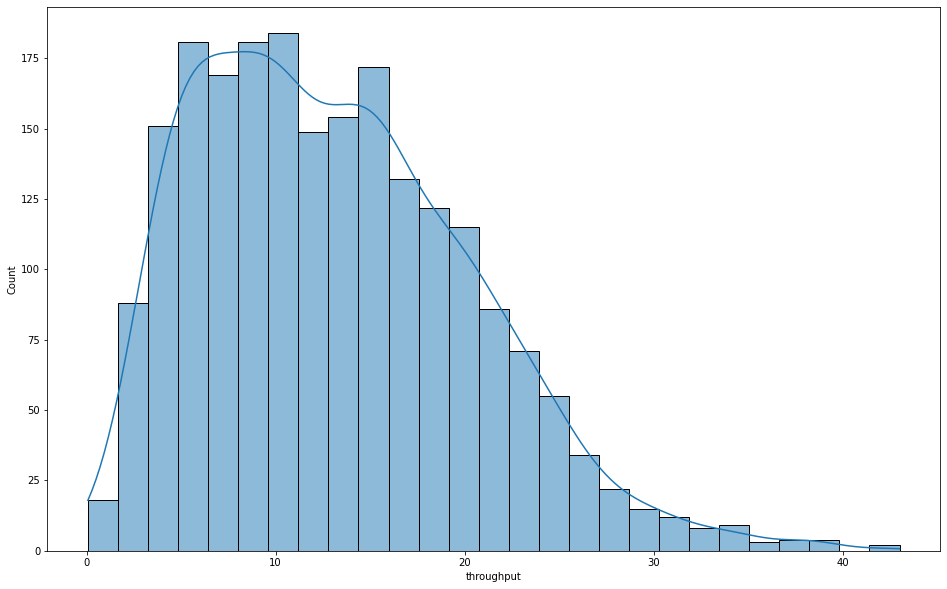

In [30]:
plt.figure(figsize=(16,10))
sns.histplot(data=df, x='throughput',kde=True);
# note that the distribution is not normal (it resembles a Poisson distribution, which is a plaussible assumption for a communication model)

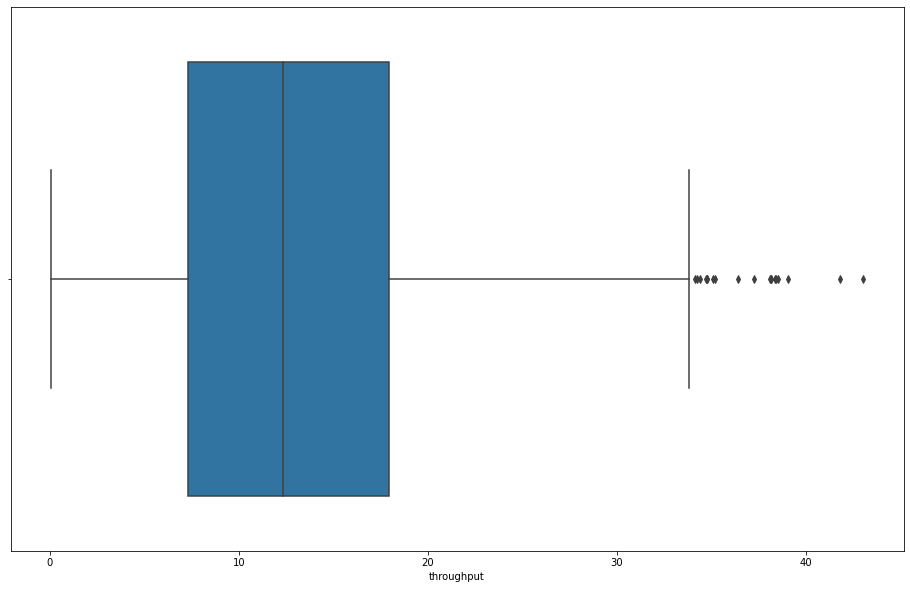

In [31]:
plt.figure(figsize=(16,10))
sns.boxplot(data=df, x='throughput');

# note some outliers by the IQR method 

## Correlation Heatmap

### Explore Correlation Heatmap

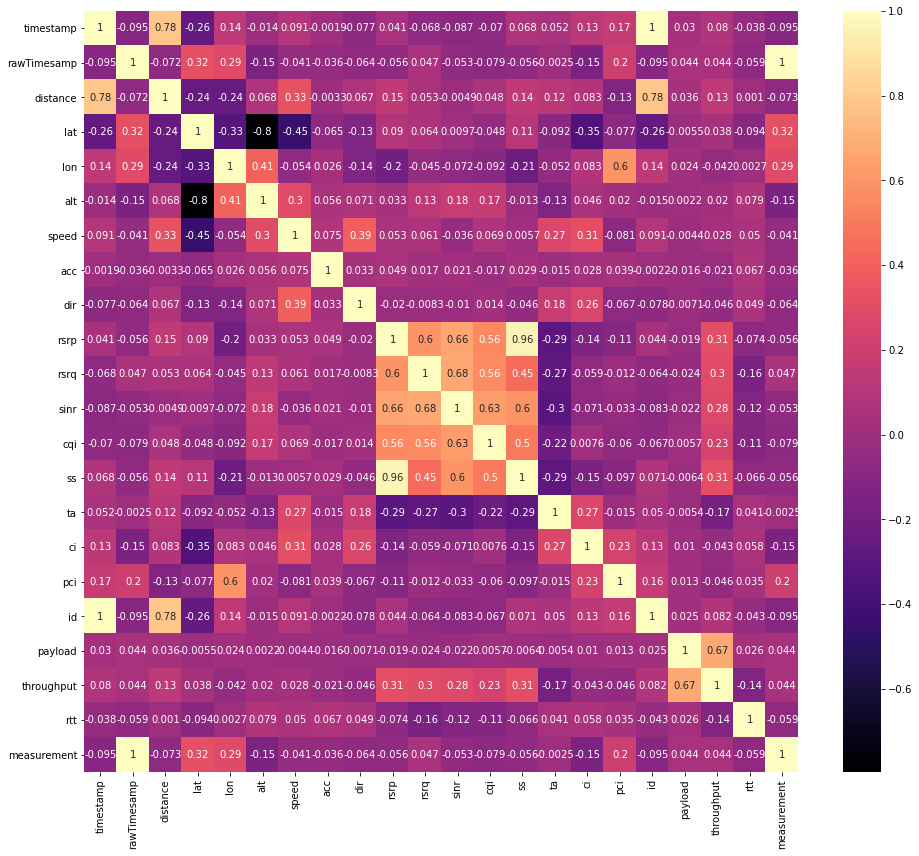

In [32]:
plt.figure(figsize=(16,14))
sns.heatmap(df.corr(),cmap='magma',annot=True);

**Heatmap Finding**

**High Positive Correlation**
- id vs timestamp
- measuremet vs rawTimesamp
- rsrp vs ss (signal strength) 

**Positive Correlation**
- pci vs lon

**Negative Correlation**
- speed vs lat

**High Negative Correlation**
- alt vs lat

**Label**

Throughput shows non-zero correlations with features -> some signal will be picked by the model / no zero importance features

**Heatmap Finding Conclusion**

- Drop **id** and **measurement**: (a) both enconded in other features (b) irrelevant for our predictions (watch out for systematic errors in the experiment phase!) 

- For the reason delineated in (b) we also drop **pci** (physical cell id) (watch out for systematic errors in the experiment phase!) 

- Drop **ss**: calculated based off rsrp / linear transformation of rsrp -> will lead to decreased generalization performance of ML models

### Drop Features based on Heatmap Finding

In [33]:
df = df.drop('id',axis=1)
df = df.drop('measurement', axis=1)
df = df.drop('pci',axis=1)
df = df.drop('ss',axis=1)

# alt vs lat are highly correlated! 

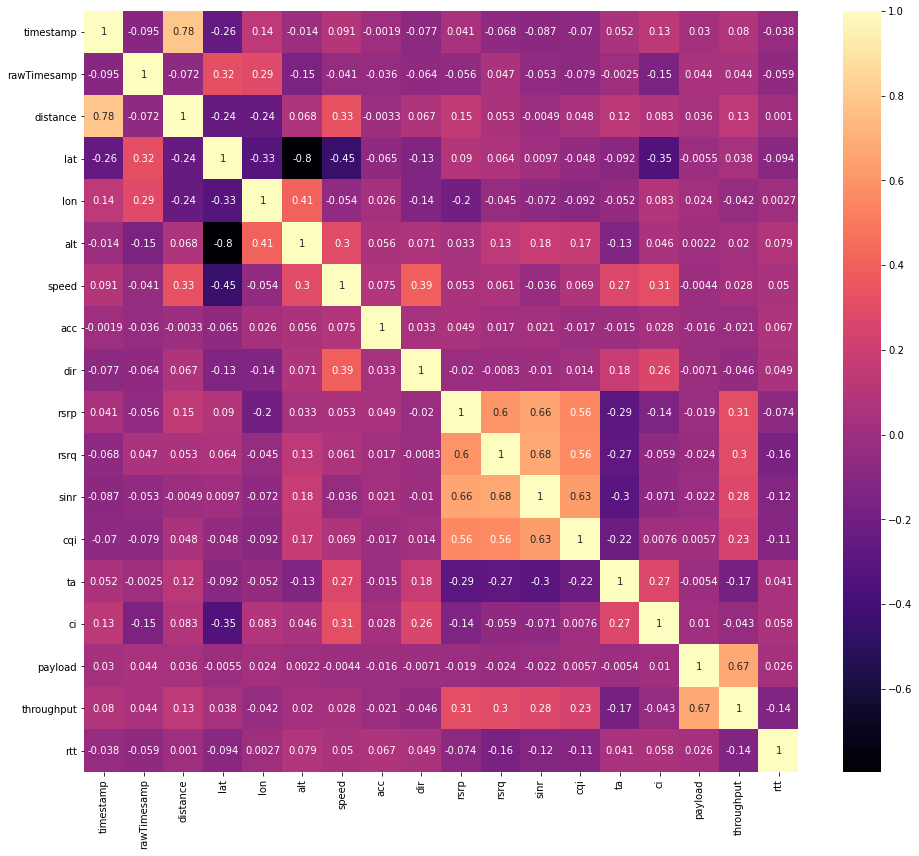

In [34]:
plt.figure(figsize=(16,14))
sns.heatmap(df.corr(),cmap='magma',annot=True);

## Check for Missing Data

In [35]:
def percent_missing(df): 
    percent_nan = df.isnull().sum() / len(df) * 100
    percent_nan = percent_nan[percent_nan>0].sort_values()
    
    return percent_nan

In [36]:
percent_missing(df).sum()
# no misiing data

0.0

In [37]:
# Plot percentage of missing data as bar graph (no missing data in this case)

# percent_nan = percent_missing(df)
# 
# plt.figure(figsize=(10,8))
# sns.barplot(x=percent_nan.index,y=percent_nan)
# plt.xticks(rotation=90);

## Further Feature Exploration and Selection 

### Datetime

In [38]:
df_raw.columns

Index(['timestamp', 'rawTimesamp', 'distance', 'lat', 'lon', 'alt', 'speed',
       'acc', 'dir', 'connected', 'rsrp', 'rsrq', 'sinr', 'cqi', 'ss', 'ta',
       'ci', 'pci', 'id', 'payload', 'throughput', 'rtt', 'measurement',
       'location'],
      dtype='object')

#### timestamp Feature

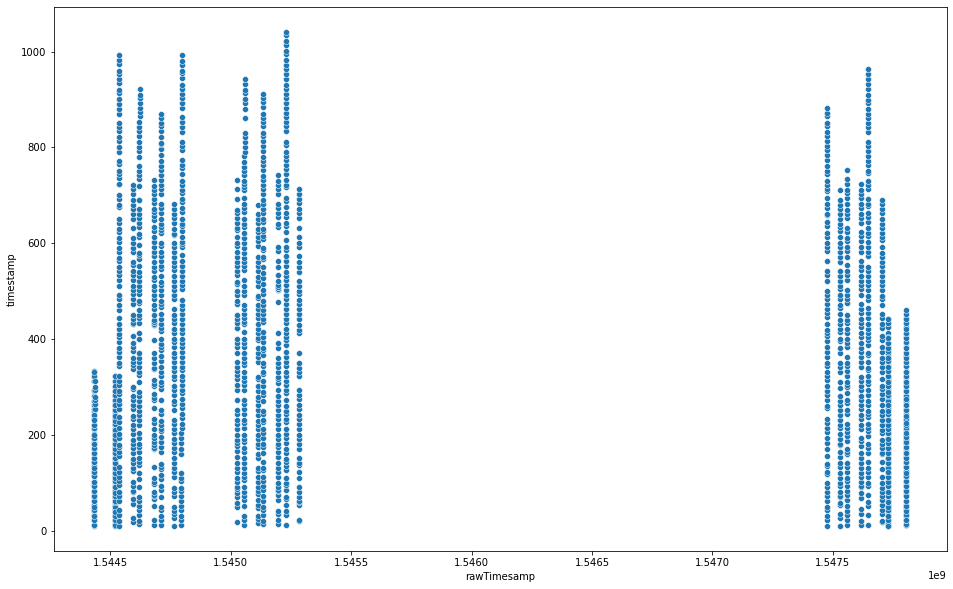

In [39]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=df_raw, x='rawTimesamp',y='timestamp');
# timestamp seems to be an arbitrary value assigned on the datapoint depending on the particular experiment (measurement). 

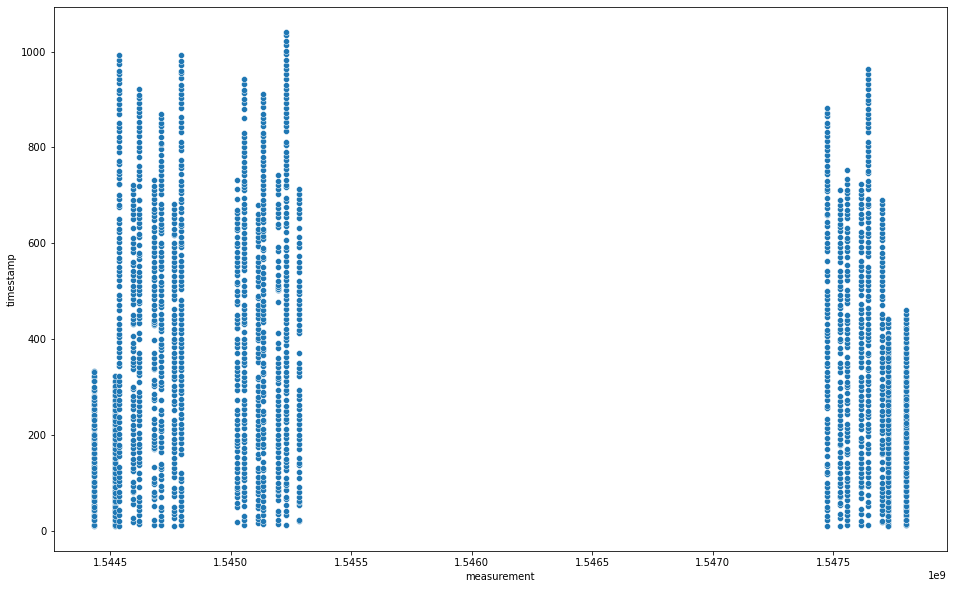

In [40]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=df_raw, x='measurement',y='timestamp');

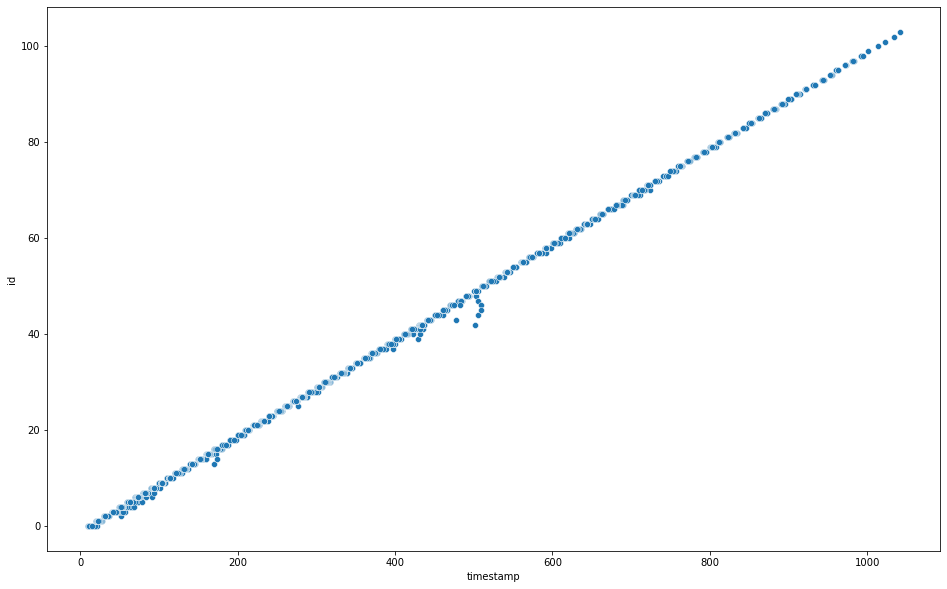

In [41]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=df_raw, y='id',x='timestamp');

# note also the timestamp encondes id / higly correlated to id (as noted in the heatmap). We drop timestamp for the following reasons: (a) our predictions should be independent of vehicle / measurement id, (b) rawTimesamp functions as a datetime object for the data frame, and (c) we don't have enough context to interpret id

In [42]:
df = df.drop('timestamp', axis=1)

In [43]:
# we also rename rawTimesamp to better describe the feature
df = df.rename(columns={'rawTimesamp':'unix_time'})

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2141 entries, 0 to 2140
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unix_time   2141 non-null   int64  
 1   distance    2141 non-null   float64
 2   lat         2141 non-null   float64
 3   lon         2141 non-null   float64
 4   alt         2141 non-null   float64
 5   speed       2141 non-null   float64
 6   acc         2141 non-null   float64
 7   dir         2141 non-null   float64
 8   rsrp        2141 non-null   int64  
 9   rsrq        2141 non-null   int64  
 10  sinr        2141 non-null   int64  
 11  cqi         2141 non-null   int64  
 12  ta          2141 non-null   int64  
 13  ci          2141 non-null   int64  
 14  payload     2141 non-null   float64
 15  throughput  2141 non-null   float64
 16  rtt         2141 non-null   int64  
 17  location    2141 non-null   object 
dtypes: float64(9), int64(8), object(1)
memory usage: 301.2+ KB


**Features**
1. unix time
2. distance
3. location
    - latitude
    - longitude
    - altitude
4. motion
    - speed
    - acceleration
    - direction
5. LTE performance
    - rsrp
    - rsrq
    - sinr
    - cqi (categorical?)
    - ta (categorical?)
6. ci (categorical!)
7. payload
8. rtt
9. location -> district (categorical!)

#### unix_time Feature

We break down Unix time into more useful (categorical) features. 

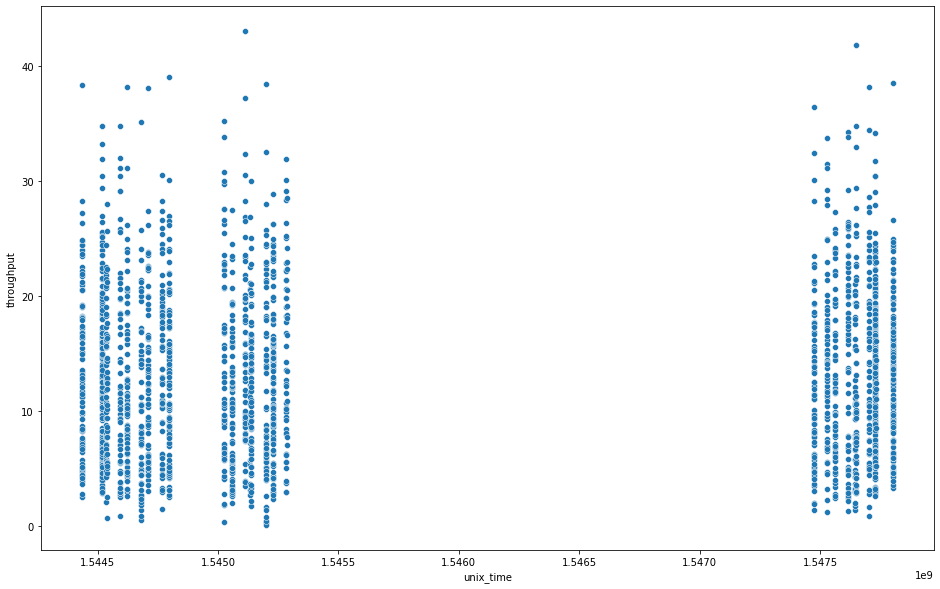

In [45]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=df, x='unix_time',y='throughput');

In [46]:
datetime_series = df['unix_time'].apply(lambda unix_time : datetime.fromtimestamp(unix_time))

In [47]:
datetime_series

0      2018-12-10 10:08:57
1      2018-12-10 10:09:09
2      2018-12-10 10:09:19
3      2018-12-10 10:09:33
4      2018-12-10 10:09:42
               ...        
2136   2019-01-18 10:22:10
2137   2019-01-18 10:22:23
2138   2019-01-18 10:22:30
2139   2019-01-18 10:22:41
2140   2019-01-18 10:22:49
Name: unix_time, Length: 2141, dtype: datetime64[ns]

In [48]:
datetime_series.apply(lambda dt : dt.year).unique()
# not enough data -> disregard

array([2018, 2019])

In [49]:
datetime_series.apply(lambda dt : dt.month).unique()
# not enough data -> disregard

array([12,  1])

In [50]:
datetime_series.apply(lambda dt : dt.hour).unique()
# might be interesting to engineer the features morning and afternoon -> dive deeper

array([10,  9,  6, 14, 15, 12, 13])

In [51]:
hour_arr = datetime_series.apply(lambda dt : dt.hour)

In [52]:
hour_df = pd.DataFrame(hour_arr)

In [53]:
hour_df = hour_df.rename({'unix_time':'hour'},axis=1)

In [54]:
hour_df.value_counts()
# distributed fairly evenly -> make categories morning (5 < t_0 < 11) and afternoon (11 < t_0 < 16), i.e. a binary categorical feature

hour
6       640
14      505
10      309
13      297
15      274
9       114
12        2
dtype: int64

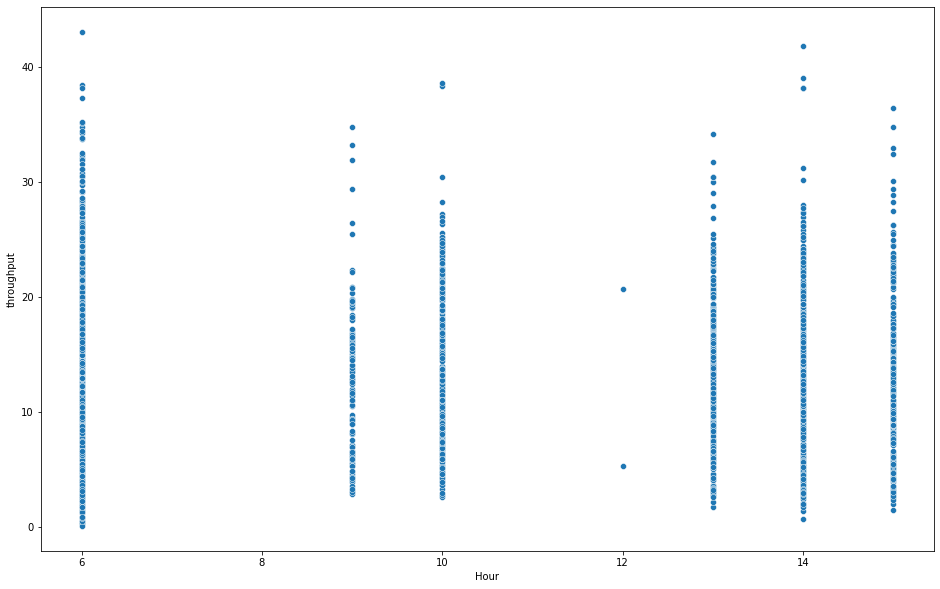

In [55]:
plt.figure(figsize=(16,10))
ax = sns.scatterplot(x=hour_arr,y=df['throughput'])
ax.set_xlabel('Hour');

In [56]:
def morning(h): 
    if h<11: 
        return 1 
    else: 
        return 0

In [57]:
hour_df['hour'] = hour_df['hour'].apply(morning)

In [58]:
hour_df = hour_df.rename({'hour':'morning'},axis=1)

In [59]:
hour_df.value_counts()

morning
0          1078
1          1063
dtype: int64

---

In [60]:
datetime_series.apply(lambda dt : dt.weekday()).unique()
# all days of the week -> dive deeper

array([0, 1, 2, 3, 4])

In [61]:
weekday_arr = datetime_series.apply(lambda dt : dt.weekday())

In [62]:
weekday_df = pd.DataFrame(weekday_arr)

In [63]:
weekday_df = weekday_df.rename({'unix_time':'weekday'},axis=1)

In [64]:
weekday_df.value_counts()
# make categorical feature weekday

weekday
1          563
3          493
2          462
0          324
4          299
dtype: int64

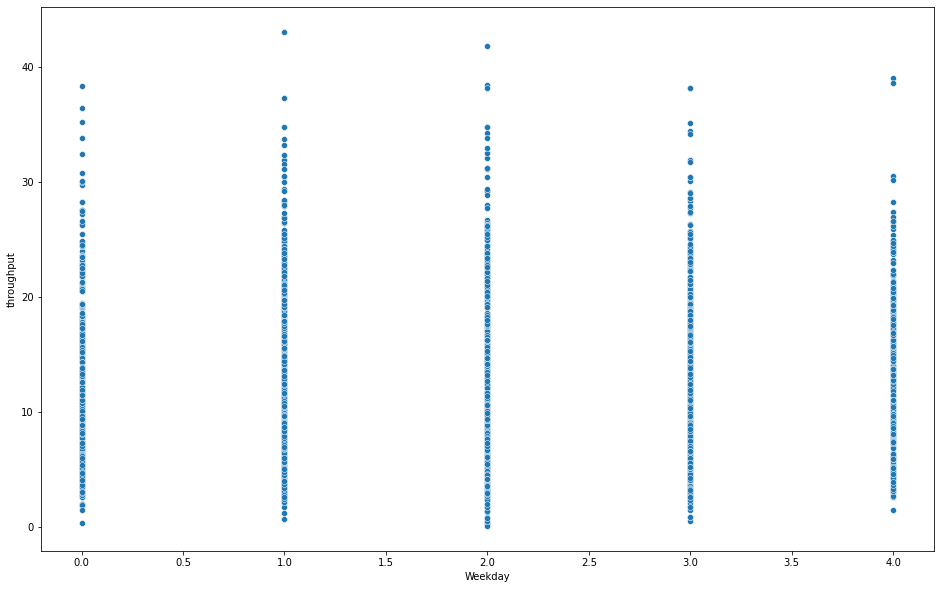

In [65]:
plt.figure(figsize=(16,10))
ax = sns.scatterplot(x=weekday_arr,y=df['throughput'])
ax.set_xlabel('Weekday');

In [66]:
# add new features to df and drop unix_time: 
df['morning'] = hour_df['morning']
df['weekday'] = weekday_df['weekday']
df = df.drop('unix_time',axis=1)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2141 entries, 0 to 2140
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   distance    2141 non-null   float64
 1   lat         2141 non-null   float64
 2   lon         2141 non-null   float64
 3   alt         2141 non-null   float64
 4   speed       2141 non-null   float64
 5   acc         2141 non-null   float64
 6   dir         2141 non-null   float64
 7   rsrp        2141 non-null   int64  
 8   rsrq        2141 non-null   int64  
 9   sinr        2141 non-null   int64  
 10  cqi         2141 non-null   int64  
 11  ta          2141 non-null   int64  
 12  ci          2141 non-null   int64  
 13  payload     2141 non-null   float64
 14  throughput  2141 non-null   float64
 15  rtt         2141 non-null   int64  
 16  location    2141 non-null   object 
 17  morning     2141 non-null   int64  
 18  weekday     2141 non-null   int64  
dtypes: float64(9), int64(9), ob

### Distance

In [71]:
df['distance'].describe()

count     2141.000000
mean      4273.932844
std       3774.430086
min         99.420000
25%       1365.830000
50%       2825.780000
75%       6435.790000
max      14124.020000
Name: distance, dtype: float64

### Location: Latitude, Longitude, and Altitude / Elevation

In [73]:
df['lat'].describe()

count    2141.000000
mean       51.478644
std         0.022528
min        51.437142
25%        51.463083
50%        51.481652
75%        51.490668
max        51.517905
Name: lat, dtype: float64

In [74]:
df['lon'].describe()

count    2141.000000
mean        7.445595
std         0.030796
min         7.393019
25%         7.416637
50%         7.450149
75%         7.473018
max         7.491755
Name: lon, dtype: float64

In [75]:
df['alt'].describe()

count    2141.000000
mean      177.235390
std        41.975692
min       125.060000
25%       152.000000
50%       163.700000
75%       181.920000
max       297.820000
Name: alt, dtype: float64

### Motion: Speed, Acceleration, and Direction

In [76]:
df['speed'].describe()

count    2141.000000
mean       12.154703
std         8.870322
min         0.000000
25%         6.860000
50%        12.450000
75%        14.990000
max        39.340000
Name: speed, dtype: float64

In [77]:
df['acc'].describe()

count    2141.000000
mean        0.004447
std         1.123975
min       -11.050000
25%         0.000000
50%         0.000000
75%         0.000000
max        17.260000
Name: acc, dtype: float64

In [78]:
df['dir'].describe()

count    2141.000000
mean      164.828720
std        93.178596
min         0.030000
25%        92.300000
50%       150.270000
75%       250.640000
max       359.980000
Name: dir, dtype: float64

### LTE Performance: RSRP, RSRQ, SINR, CQI, TA, CI

In [ ]:
np.sort(day_arr.unique())

In [ ]:
len(day_series.unique())
# the different experiments took place over 11 days 

In [ ]:
hour_arr = datetime_series.apply(lambda dt : dt.hour)

In [ ]:
np.sort(hour_arr.unique())

### Location

In [ ]:
plt.figure(figsize=(16,14))
sns.heatmap(df.corr(),cmap='magma',annot=True);

# we investiate the correlation altitude vs latitude

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=df, x='lat',y='lon',hue='alt');

# note that this high negative correlation might introduce systematic errors to our model

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=df, x='lat',y='alt',hue='throughput',palette='magma');

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=df, x='lat',y='lon',hue='alt');

# note that this high negative correlation might introduce systematic errors to our model

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


# axes instance
fig = plt.figure(figsize=(16,10))
ax = Axes3D(fig)

# data
x = df['lat']
y = df['lon']
z = df['alt']
c = df['rsrp']

# plot
sc = ax.scatter(x,y,z,s=40,c=c,cmap='magma',alpha=.75)
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Altitude')

# legend
plt.legend(*sc.legend_elements(), loc='best');

# save
# plt.savefig("scatter_hue", bbox_inches='tight')

In [ ]:
df['location'].unique()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


# axes instance
fig = plt.figure(figsize=(16,10))
ax = Axes3D(fig)

# data
x = df['lat']
y = df['lon']
z = df['alt']

m = {'campus':1, 'highway':2, 'suburban':3, 'urban':4}
c = df['location'].map(m)


# plot
sc = ax.scatter(x,y,z,s=40,c=c,alpha=.75)
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Altitude')

# legend
plt.legend(*sc.legend_elements(), loc='best');

# save
# plt.savefig("scatter_hue", bbox_inches='tight')

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=df, x='lat',y='lon',hue='location',palette='magma');

In [ ]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(data=df, x='lat',y='lon',hue='rsrp',palette='magma');

In [ ]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(data=df, x='lat',y='alt',hue='rsrp',palette='magma');

In [ ]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(data=df, x='rsrp',y='alt');

In [ ]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(data=df, x='rsrp',y='lat');

In [ ]:
df['alt'].describe()

In [ ]:
# drop features which make geographically no sense

---
**STOP**

---

In [ ]:
df['ta'].unique()

In [ ]:
df['cqi'].unique()

In [ ]:
# drop id's (assumption: all cars, transmitters and receiver are working correctly and the noise they might be producing will not be taken into account; our taks is not to identify abnormal vehicles or devices)

# in the experiment phase we should be careful so as to not build in systematic mistakes in our measurements! 

In [ ]:
df.head()

In [ ]:
# note that although per the documentation the SS is made redundant by the RSRP the correlation is not 1. 

# (we'll focus on SS (signal strentgh) as it is defined for various different stadards (see: https://www.lte-anbieter.info/technik/asu.php))

df[['rsrp', 'rsrq', 'sinr', 'cqi']].corr()

In [ ]:
# plt.figure(figsize=(10,8))
# sns.scatterplot(data=df, x='rsrp', y='ss')

---

### Check for Outliers

In [ ]:
label = df['throughput']

In [ ]:
q75, q25 = np.percentile(a=label, q=[75,25])
IQR = q75 - q25

low_lim = q25-1.5*IQR
up_lim = q75+1.5*IQR

In [ ]:
outliers = label[(label < low_lim) | (label > up_lim)]
len(outliers)

# there are 19 outlierts in the data set by IQR method 

In [ ]:
f'Outliers are {len(outliers)/len(df)*100:.2f}% of the Download data'

In [ ]:
# since the number is low we might consider dropping the these rows

#### Check Correlations with the Label

In [ ]:
df.corr()['throughput'].sort_values(ascending=False)
# note that payload is highly positively correlated to download throughput (it also makes sense that a higher payload produces a high throughput)

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='payload', y='throughput',hue='rsrp',palette='magma')

plt.axhline(y=up_lim,color='orange',alpha=.5,label='q75 + 1.5 IQR')

plt.legend(loc='best')

#plt.axhline(y=d_low_lim,color='orange')

# note that within every payload size we have a distribution and as payload increses, so does the throughput but also the variane of the distribution within the payload

# remove the outlier at x=0.1

In [ ]:
np.sort(df['payload'].unique())
# precision of the payload column / x axis 

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='ss', y='throughput',hue='rsrp',palette='magma')
plt.axhline(y=up_lim,color='orange')

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='rsrp', y='throughput')
plt.axhline(y=up_lim,color='orange')

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='rsrq', y='throughput')
plt.axhline(y=up_lim,color='orange')

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='sinr', y='throughput')
plt.axhline(y=up_lim,color='orange')

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='cqi', y='throughput')
plt.axhline(y=up_lim,color='orange')

### Transform Categorical Non-Ordinal Features

## Move Label to the End of the DataFrame

In [ ]:
cols = list(df.columns)
cols.pop(cols.index('throughput'))

df = df[cols+['throughput']]

In [ ]:
df.head()

### Scale Data

ML Models look at feature space. With the use of Polynomial Regression and SVM Kernels we typically expand the feature space and look at its geometry. Thus, it's important to scale the data!

### Export DataFrame to .CSV

In [ ]:
# df.to_csv()

---

In [ ]:
sns.scatterplot(data=df, x='lat',y='lon',hue='location')

In [ ]:
sns.scatterplot(data=df, x='lat',y='lon',hue='distance',palette='magma')

In [ ]:
sns.scatterplot(data=df, x='lat',y='lon',hue='speed',palette='magma')

In [ ]:
sns.scatterplot(data=df, x='lat',y='lon',hue='acc',palette='magma')

In [ ]:
sns.scatterplot(data=df, x='lat',y='lon',hue='rawTimesamp')

In [ ]:
sns.scatterplot(data=df, x='lat',y='lon',hue='timestamp')

In [ ]:
sns.scatterplot(data=df, x='lat',y='lon',hue='measurement')

In [ ]:
# timestamp: seems like an 'arbitrary' variable (drop this column?)
# rawTimesamp: unix timestamp; visit unixtimestamp.com/ to convert (correction of column name!)
# distance: distance from cell tower
# lat: latitude
# lon: longitude
# alt: altitude relative to NHN
# speed: [speed] = m/s
# acc: [acc] = m/s**2; contains negative values!
# dir: [dir] = grad; north === 0; dir: S -> [0,359.99]
# connect: LTE connection; here always one (drop this column!)

# signal performance indicator; visit cablefree.net/wirelesstechnology/4glte/rsrp-rsrq-measurement-lte/ for more detail
    # rsrp: performance indicator based on path loss; all values are negative (possibly irrelevant!)
    # rsrq: performance indicator; can contain negative values (possible irrelevant!)
    # sinr: performance indicator; can contain negative values (possible irrelevant!)
    # cqi: ? 
    # ss === Arbitrary Strength Unit (ASU); rsrp = ASU - 140 (redudant! drop this column!) 
    # ta: ? 
    # ci: ? 

# pci: physical cell ID; internal information (irrelevant!)
# id: vehicle ID
# payload: [payload] = MB
# throughput: [throughput] = mbits (key value!)
# rtt: [rtt] = ms; round trip time for the signal (vehicle -> tower -> vehicle)
# measuremt: experiment number 
# location: name of the location; location: S -> {'campus', 'highway', 'suburban', 'urban'}

# there is no column reflecting the frequency of the signal (see Variablenbeschreibung in moodfe) (?)

# drop: timestamp, connect, ss, pci (?)
# rename: rawTimesamp -> timestamp
df.columns

In [ ]:
# Variablenbeschreibung

# - timestamp_ms ist ein Unix Timestamp, welcher die Umrechnung in eine konkrete Uhrzeit ermöglicht
# (siehe https://www.unixtimestamp.com/)
# - altitude_m die Höhe über Normalnull
# - veclocity ist in meter/s und acceleration in meter/s^2: Für die Beschleunigung sind negative Werte durch Bremsen 
# möglich (Änderung der Geschwindigkeit)
# - direction ist die Richtung in Grad, Norden entspricht 0 - isRegistered gibt an, ob das Gerät eine aktive 
# Verbindung zu einer LTE Zelle hat
# - rsrp ist ein Indikator für die Empfangsleistung und durch den Pfadverlust immer negativ – das heißt dann 
# einfach, dass nur sehr geringe Leistungsmengen beim Endgerät ankommen - rsrq und rssinr sind Verhältnisse von 
# Leistungen, auch hier sind negative werte möglich 
# (siehe auch https://www.cablefree.net/wirelesstechnology/4glte/rsrp-rsrq-measurement-lte/)
# - ss entspricht der Arbitrary Strength Unit (ASU) und ist redundant zum RSRP, da RSRP = ASU – 140
# - pci ist die Physical Cell Id, welche intern vom Endgerät verwendet wird, um Codierungsaufgaben zu machen 
# -> Sollte für euch nicht wichtig sein
# - payload entspricht der übertragenden Datenmenge in Megabyte
# - througput_mbits entspricht der Datenrate und somit der Zielgröße
# - connected 1 wenn eine Verbindung besteht 0 sonst
# - rtt_ms ist die Round Trip Time: Also die Signallaufzeit vom Sender zum Empfänger und wieder zurück
# - txPower_dBm entspricht der Sendeleistung des Endgerätes (somit auch nur im Uplink verfügbar, weil das 
# Endgerät im Downlink nur empfängt)
# - f_mhz entspricht der Trägerfrequenz der Basisstation, daher ist dies auch in wichtiges Feature, da die 
# Frequenz einen großen Einfluss auf die Funkausbreitungseigenschaften hat 
# - measurement ist die jeweilige Messfahrt

In [ ]:
df['id'].unique()
# array of vehicle IDs?

In [ ]:
df['id'].unique() == ul['id'].unique()
# note that the vehicles are not identical 

In [ ]:
df['location'].unique()

In [ ]:
df['location'].unique() == ul['location'].unique()

In [ ]:
# len(df['timestamp'].unique())
# we dropped this feature

In [ ]:
len(df['rawTimesamp'].unique())
# note that 'timestamp' and 'rawTimesamp' are differing amount of unique values

In [ ]:
len(df)
# rawTimesamp cannot be index because it's not unique

In [ ]:
# len(ul['timestamp'].unique())
# we dropped this feature

In [ ]:
df.equals(df.drop_duplicates())
# no duplicates in download DataFrame

In [ ]:
df.sort_values('rawTimesamp').head()

In [ ]:
# pd.to_datetime(df['rawTimesamp'],unit='s')
# pd.to_datetime(ul['rawTimesamp'],unit='s')
# change the timestamp format if neccessary

In [ ]:
# apply filters to DataFrame? 

# sub-DataFrame per location with a filter or with isin() method
    # df[df['location']=='campus']
    # df[df['location']=='highway']
    # df[df['location']=='suburban']
    # df[df['location']=='urban']
    
    # ul[ul['location']=='campus']
    # ul[ul['location']=='highway']
    # ul[ul['location']=='suburban']
    # ul[ul['location']=='urban']

## Part 4

In [ ]:
df.corr()

In [ ]:
df['location'].value_counts()
# good categorical data to group by

In [ ]:
df.duplicated()

In [ ]:
df.nlargest(5,'throughput')

In [ ]:
df.nsmallest(5,'throughput')

In [ ]:
ul.nlargest(5,'throughput')

In [ ]:
ul.nsmallest(5,'throughput')

## Part 5

In [ ]:
# df.groupby(['model_year','cylinders']).describe().transpose()

In [ ]:
# convert the rawTimesamp from an integer into a datetime object

In [ ]:
# sns.pairplot(data=df, kind='kde')
# plt.savefig('plot1.png')

# Machine Learning Models: Supervised Learning - Predict an Outcome

Starting situation: We start with a collection of organized data based on history. We have **historical labeled** data on previous rides / tours, i.e. a set of features and a label (throughput). 

Task: Create a data product that: If we take a new ride / make a new tour with a know Latitude, Longitude, ...; predict what will be the throughput. 

Data product: 
- Input: ride / tour / experiment features
- Output: predicted throughput 

Principle: we're using historical, labeled data to predict a future outcome or result

For process see GitHub Repo. 

# Linear Regression

In [ ]:
df.head()

In [ ]:
X = df.drop('throughput',axis=1)

In [ ]:
# consider the original data frame when evaluating the performance of the regression with an error evaluation metric. 
# consider the range for the values (and compare to the mean absolute error)

In [ ]:
df['throughput'].mean()

In [ ]:
sns.histplot(data=df,x='throughput', kde=True)
# the distribution is not normal but it rathers resembles a Poisson distribution

In [ ]:
ul['throughput'].mean()

In [ ]:
sns.histplot(data=ul,x='throughput', kde=True)
# the distribution resembles a unitform distribution

# Train Linear Regression Model

Create X and y

Split the data

Scale the data (Standardize)